# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

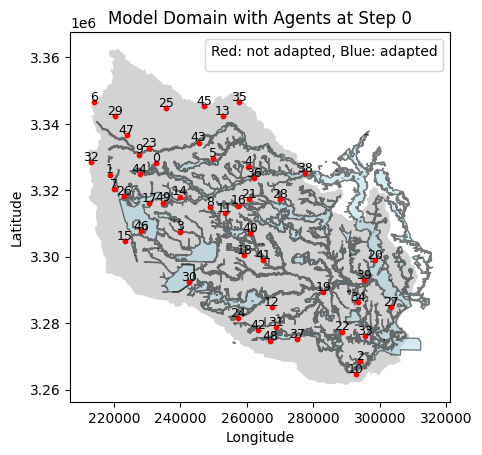

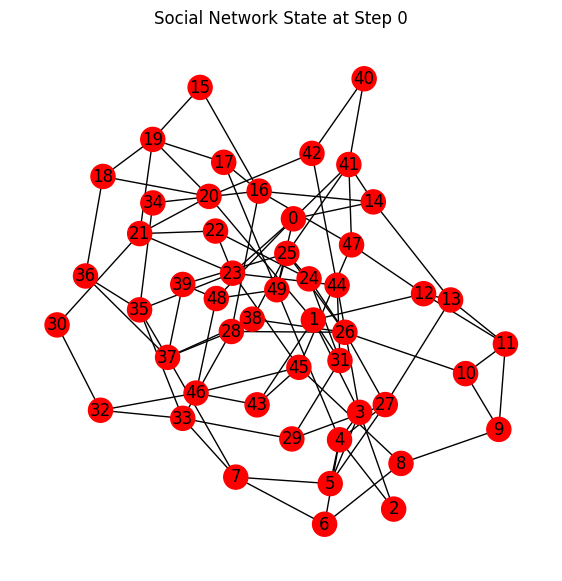

<Figure size 1000x600 with 0 Axes>

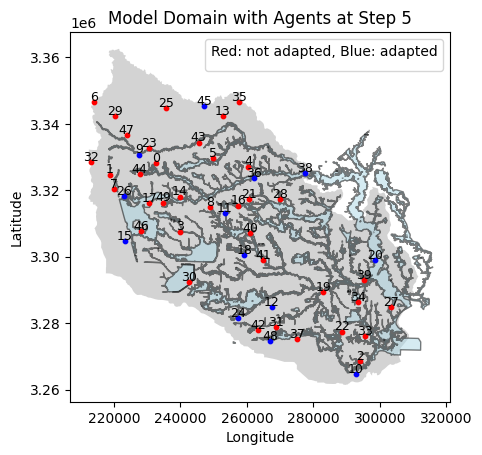

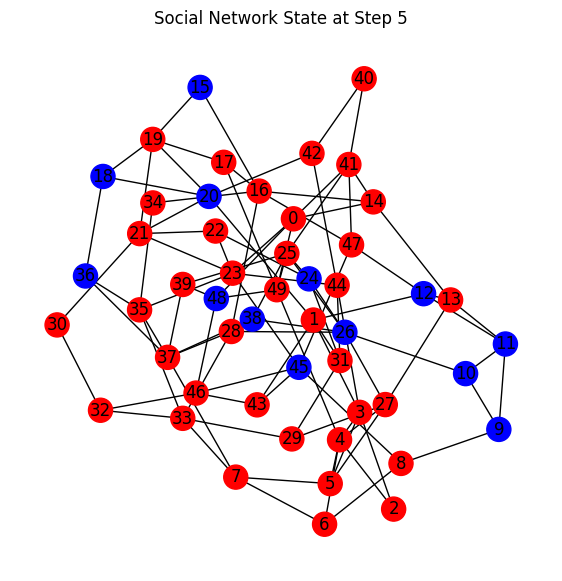

<Figure size 1000x600 with 0 Axes>

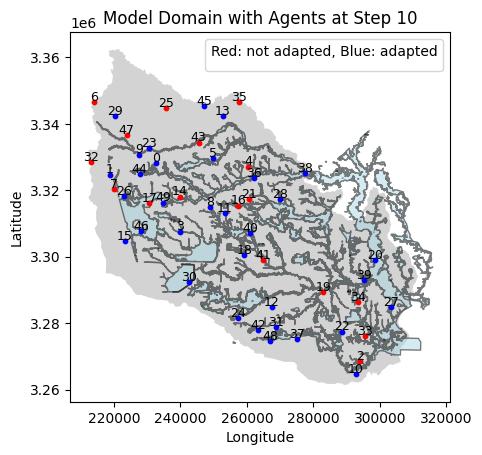

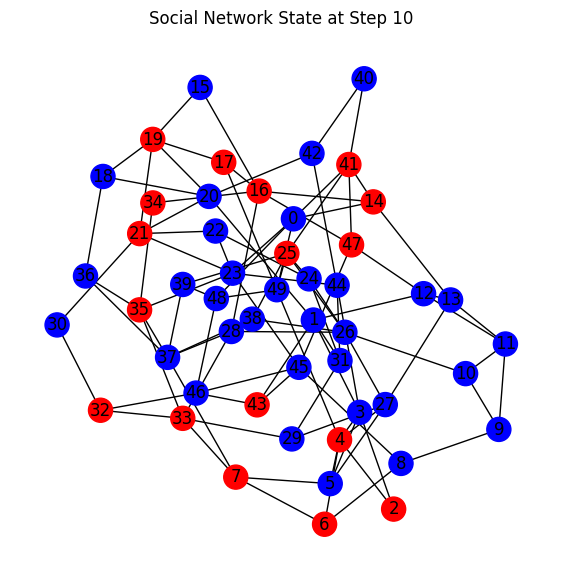

<Figure size 1000x600 with 0 Axes>

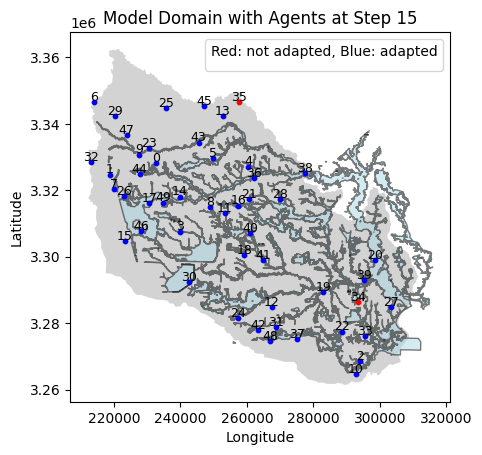

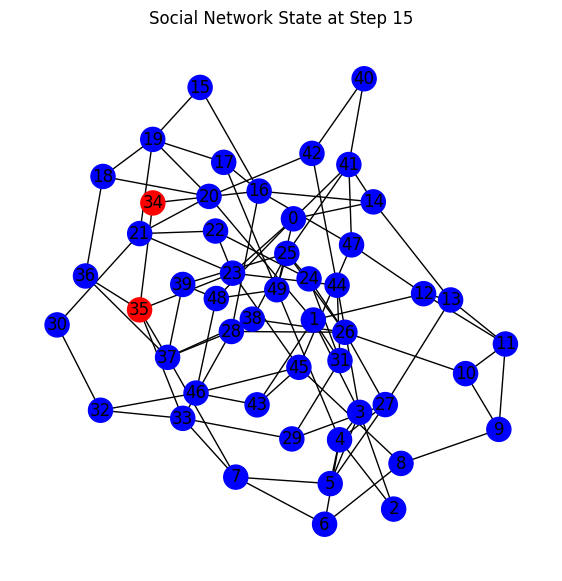

<Figure size 1000x600 with 0 Axes>

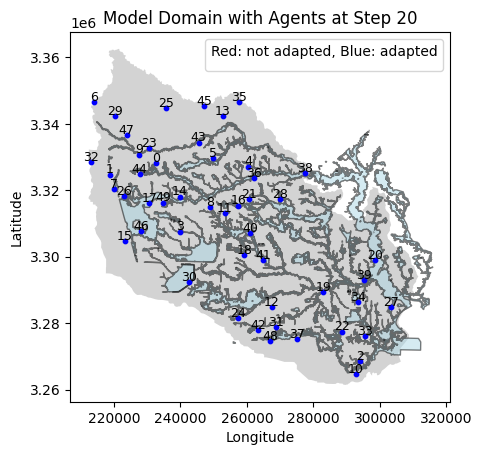

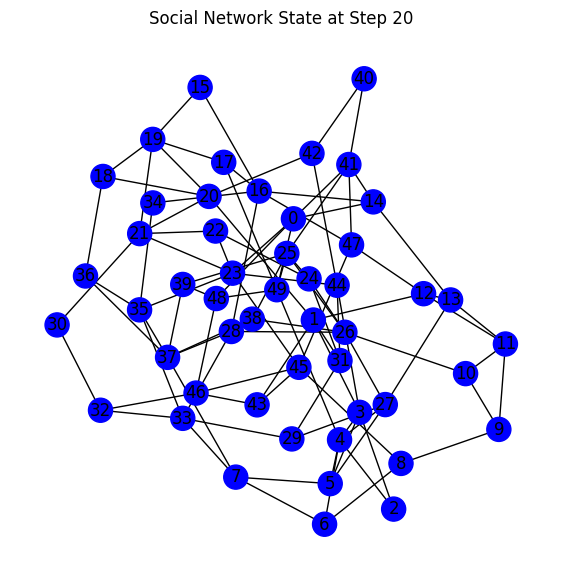

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [2]:
#random seed blijft het zelfde bij sensitivity analyse
#model = AdaptationModel(number_of_households=50, flood_map_choice="harvey",seed = 42 network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"


# experiment 1
#zelfde paramaters toetsen

result = [] 

for i in range(100):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"
    for i in range(20):
        model.step()
    output = model.datacollector.get_agent_vars_dataframe()
    output['run_number'] = i
    result.append(output)

In [3]:
import pandas as pd

In [4]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry 
agent_data['Age'].describe()
agent_data.iloc[-50:-1]['FloodDamageActual'].sum()
#agent_data.to_csv('I=55000')

12.663412454475015

In [5]:
I_4000= pd.read_csv('I=40000')
I_4500 = pd.read_csv('I=45000')
I_5000 = pd.read_csv('I=50000')
I_5500 = pd.read_csv('I=55000')


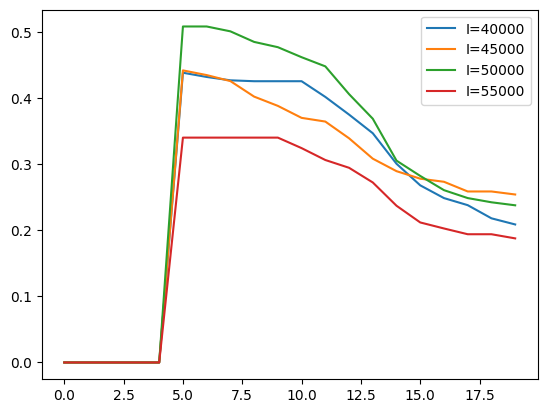

In [6]:
plt.plot(I_4000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=40000')
plt.plot(I_4500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=45000')
plt.plot(I_5000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=50000')
plt.plot(I_5500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=55000')
plt.legend()

In [7]:
agent_data.iloc[-50:-1]['Self_Investment'].mean() #average of self_investment of all agent

0.5102040816326532

In [8]:
agent_data.iloc[-50:-1]['Cum_Invest'].mean() #average of cumulative neighbor investment of all agents
#lower value probably because some agent do not have neighbors

2.0408163265306123

In [9]:
agent_data.iloc[-50:-1]['Costs'].mean()

0.3877551020408163

In [10]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Cumulative Neighbour Invest over Time')

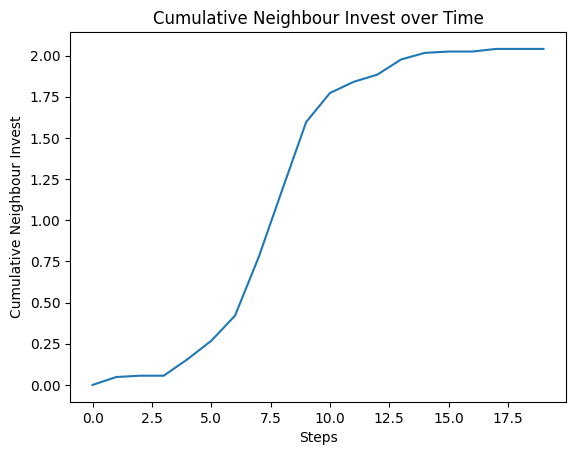

In [11]:
plt.plot(steps, agent_data.groupby(by='Step')['Cum_Invest'].mean(), label = 'Cumulative Neighbour Invest')
plt.ylabel('Cumulative Neighbour Invest')
plt.xlabel('Steps')
plt.title('Cumulative Neighbour Invest over Time')

Text(0.5, 1.0, 'Self Adaptation')

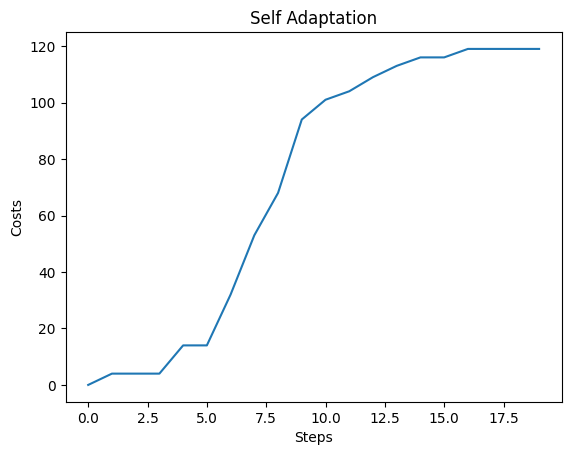

In [12]:
plt.plot(steps, agent_data.groupby(by='Step')['Self_Adaption'].sum(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Self Adaptation')

Text(0.5, 1.0, 'Costs over Time')

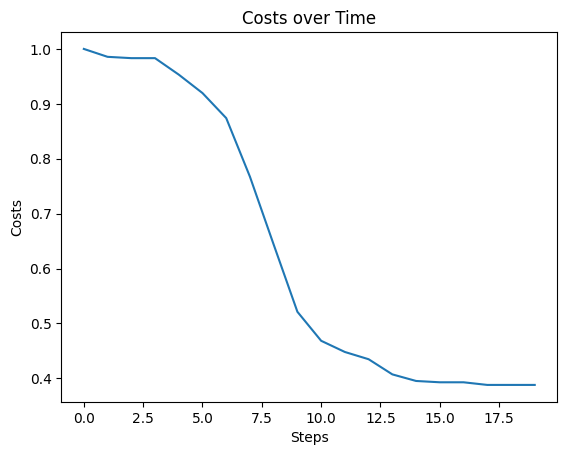

In [13]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

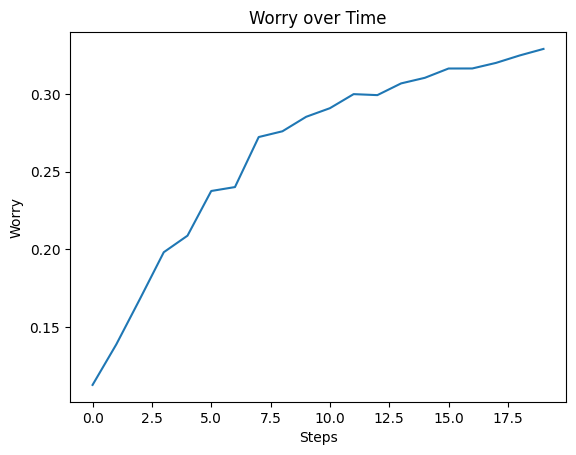

In [14]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

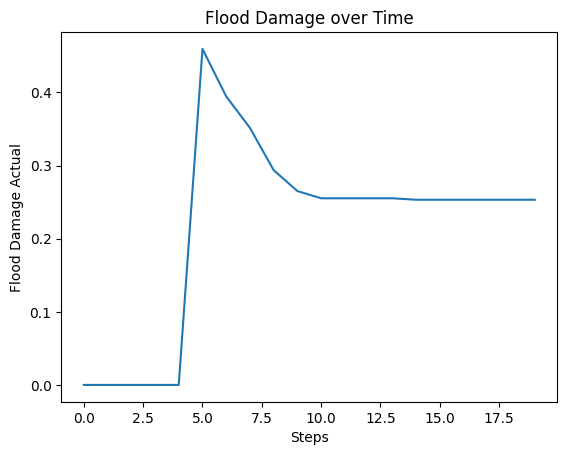

In [15]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

In [16]:
import pandas as pd

In [17]:
#I_50000 = agent_data.groupby(by='Step')['Worry'].mean()
I_45000 = agent_data.groupby(by='Step')['Worry'].mean()
#I_55000 = agent_data.groupby(by='Step')['Worry'].mean()

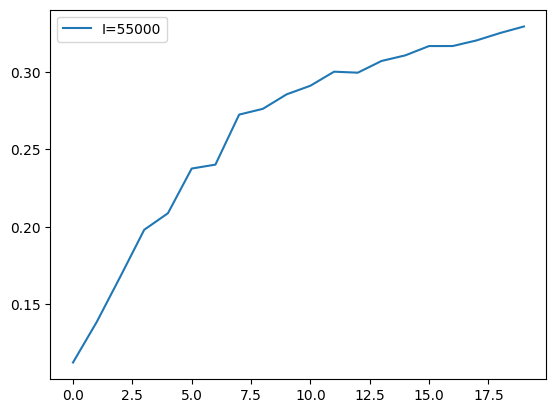

In [18]:
#plt.plot(I_50000, label='I=50000')
#plt.plot(I_45000, label='I=45000')
plt.plot(agent_data.groupby(by='Step')['Worry'].mean(), label='I=55000')
plt.legend()

Text(0.5, 1.0, 'Flood measurement active (Step10)')

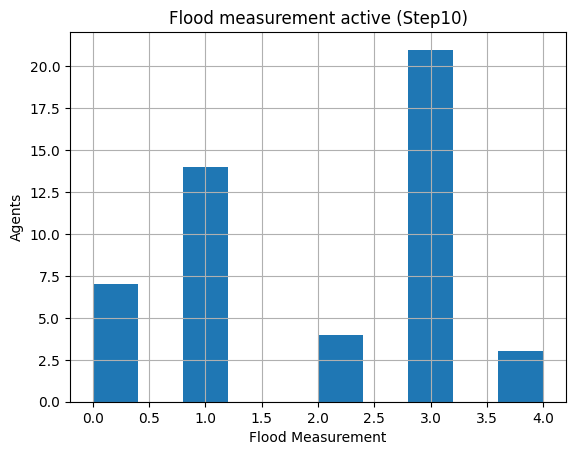

In [19]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

Text(0.5, 1.0, 'Flood measurement active (Step19)')

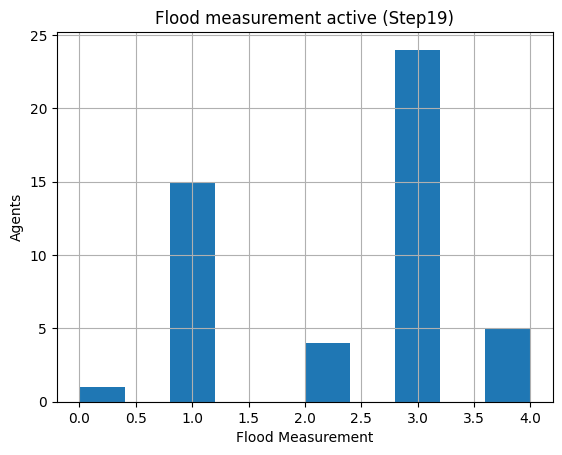

In [20]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step19)')

<Axes: xlabel='Step'>

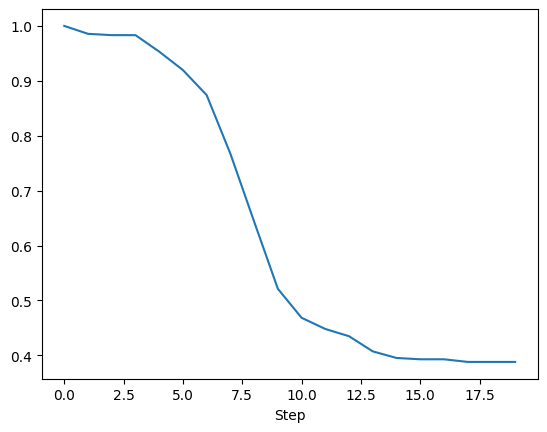

In [21]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [22]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   1.251475              0.687467          1.230790   
     1                   6.775446              1.000000          7.574880   
     2                   3.426208              0.863312          2.394037   
     3                   0.000000              0.000000          0.000000   
     4                   3.850842              0.883712          3.274090   
     5                   0.254827              0.409592          0.166844   
     6                   0.000000              0.000000          0.000000   
     7                   1.237384              0.685490          0.880622   
     8                   0.252827              0.408216          0.200760   
     9                   0.695702              0.584949          0.541475   
     10                  0.433159              0.502221          0.456998   
     11                  0.000000              0.000000          0.000000   
     12                  2.450630              0.804802          2.877411   
     13                  0.000000              0.000000          0.000000   
     14                  0.350319              0.465160          0.310141   
     15                  1.858055              0.756470          1.620809   
     16                  0.000000              0.000000          0.000000   
     17                  0.163357              0.331956          0.118524   
     18                  2.544674              0.811377          1.559765   
     19                  0.000000              0.000000          0.000000   
     20                  0.510576              0.530931          0.258680   
     21                  0.000000              0.000000          0.000000   
     22                  2.807910              0.828564          3.038562   
     23                  0.541286              0.541129          0.410280   
     24                  0.680240              0.581025          0.537778   
     25                  2.503354              0.808518          1.657921   
     26                  3.974533              0.889232          3.272880   
     27                  1.348412              0.700493          1.351293   
     28                  1.399985              0.707046          0.705044   
     29                  0.650593              0.573244          0.456639   
     30                  0.000000              0.000000          0.000000   
     31                  0.247232              0.404309          0.219041   
     32                  1.050101              0.656836          0.985714   
     33                  0.808865              0.611263          0.949961   
     34                  1.013681              0.650673          0.549622   
     35                  0.245905              0.403369          0.135014   
     36                  0.161102              0.329530          0.103691   
     37                  0.000000              0.000000          0.000000   
     38                  1.003002              0.648823          1.010228   
     39                  6.098856              1.000000          4.648760   
     40                  3.696677              0.876578          2.406361   
     41                  0.403847              0.489987          0.403136   
     42                  0.368725              0.474101          0.322418   
     43                  0.938474              0.637213          0.852489   
     44                  1.966612              0.766384          1.525933   
     45                  0.200409              0.367649          0.224136   
     46                  0.000000              0.000000          0.000000   
     47                  0.000000              0.000000          0.000000   
     48                  3.123867              0.847182          1.929423   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

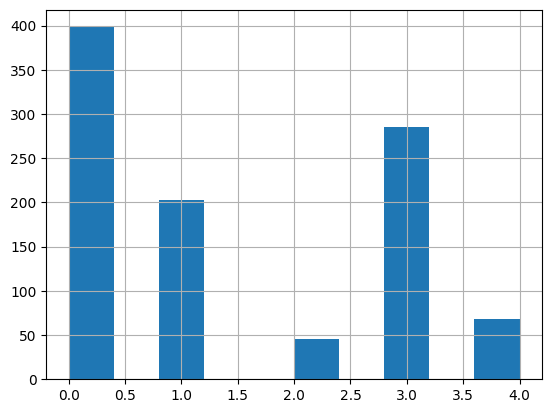

In [23]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [24]:
agent_data['FriendsCount']

Step  AgentID
0     0          6
      1          4
      2          5
      3          5
      4          4
                ..
19    45         3
      46         5
      47         3
      48         3
      49         5
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

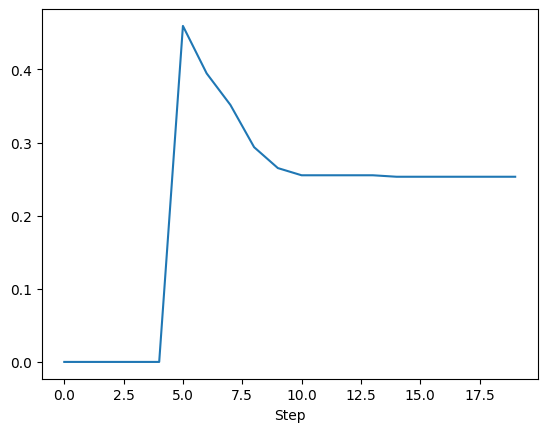

In [25]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

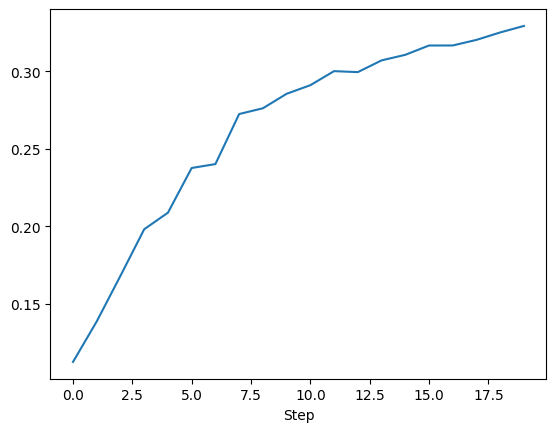

In [26]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [27]:
agent_data.groupby(by='Step')['Self_Investment'].mean()


Step
0     0.000
1     0.024
2     0.024
3     0.024
4     0.084
5     0.084
6     0.192
7     0.248
8     0.348
9     0.424
10    0.456
11    0.464
12    0.484
13    0.488
14    0.496
15    0.496
16    0.504
17    0.504
18    0.504
19    0.504
Name: Self_Investment, dtype: float64

In [28]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.258436988866837

In [29]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.26049900989888175

In [30]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.29969359589380246

In [31]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,2
2,2
3,2
4,7
5,7
6,16
7,23
8,31
9,40
